In [1]:
import pandas as pd
# Импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Задание 1

In [2]:
mean = 0 # Среднее значение
std = 1 # Стандартное отклонение (квадратный корень из дисперсии)
n = 500 # Количество точек

In [3]:
# Генерируем случайные значения из нормального распределения
x = np.random.normal(mean, std, n)
noise = np.random.normal(0, 1, size=len(x)) # Генерируем шум
x = x + noise

# Задание 1.2

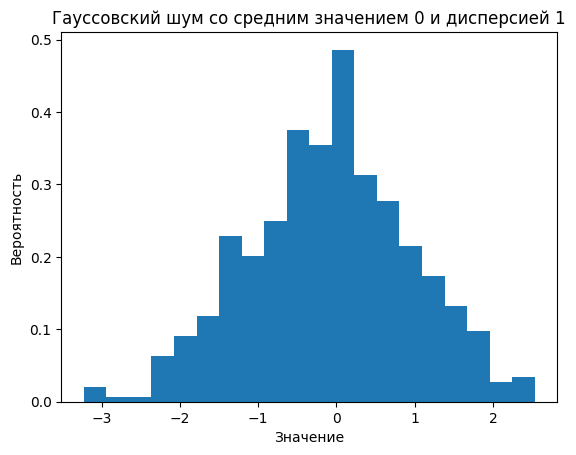

In [4]:
# Строим гистограмму
plt.hist(noise, bins=20, density=True)

# Строим теоретическую кривую плотности вероятности

plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.title('Гауссовский шум со средним значением 0 и дисперсией 1')

# Показываем график
plt.show()

<AxesSubplot: ylabel='Density'>

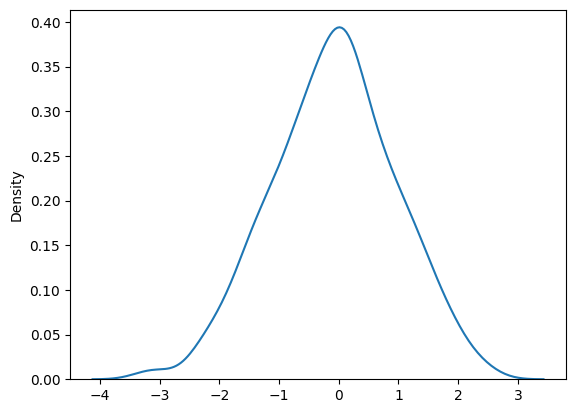

In [5]:
sns.kdeplot(noise)

<AxesSubplot: >

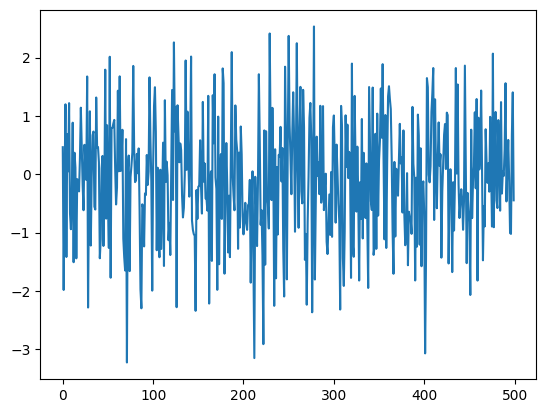

In [6]:
sns.lineplot(noise)

# Задание 1.3

In [7]:
# Определяем функцию для проверки стационарности
def check_stationarity(x, alpha=0.05):
    # Применяем тест Дики-Фуллера к выборке x
    test_stat, p_value, _, _, _, _ = sm.tsa.stattools.adfuller(x)
    # Сравниваем p-значение с уровнем значимости alpha
    if p_value < alpha:
        # Если p-значение меньше alpha, то ряд стационарен
        print(f"Выборка x является стационарной. p-значение = {p_value}")
    else:
        # Если p-значение больше или равно alpha, то ряд нестационарен
        print(f"Выборка x не является стационарной. p-значение = {p_value}")


In [8]:
check_stationarity(noise, alpha=0.05)
sm.tsa.stattools.adfuller(noise)

Выборка x является стационарной. p-значение = 3.350304903230355e-22


(-12.000796195605247,
 3.350304903230355e-22,
 2,
 497,
 {'1%': -3.4435761493506294,
  '5%': -2.867372960189225,
  '10%': -2.5698767442886696},
 1402.9212749535811)

# Задание 2.1

In [9]:
for i in range(0,499):
    x[i]+=i*0.001

# Задание 2.2

<AxesSubplot: >

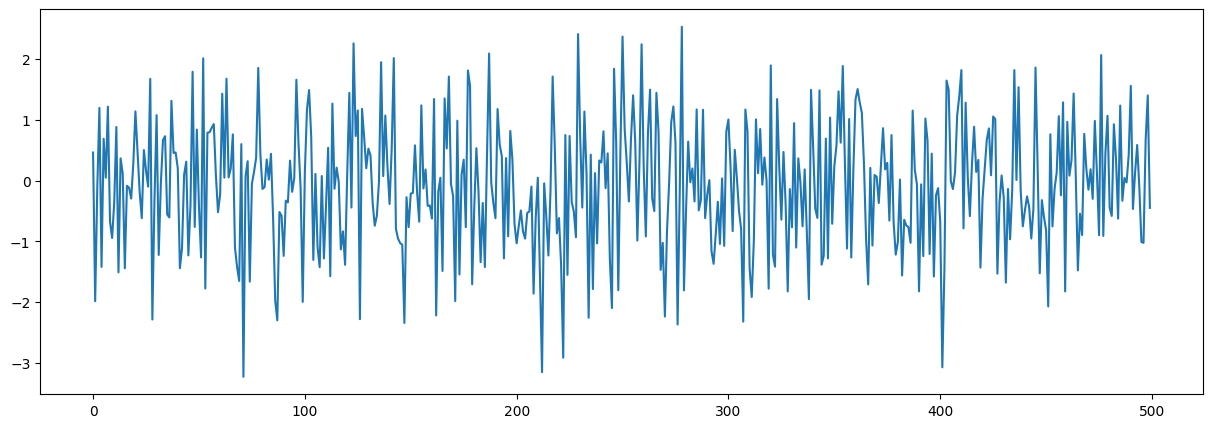

In [10]:
plt.figure(figsize=(15,5))
sns.lineplot(noise)

# Задание 2.3

In [11]:
check_stationarity(noise)

Выборка x является стационарной. p-значение = 3.350304903230355e-22


# Задание 3.1

In [12]:
df = pd.read_csv("../data/passengers.csv")

In [13]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [14]:
df1, df2, df3 = np.array_split(df, 3)

In [15]:
df1

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [16]:
from statistics import variance

print(f"Среднее в 1 части:",round(df1['#Passengers'].mean(),3))
print(f"Дисперсия в 1 части",round(variance(df1['#Passengers']),3))
print("\n")

print(f"Среднее во 2 части:",round(df2['#Passengers'].mean(),3))
print(f"Дисперсия во 2 части",round(variance(df2['#Passengers']),3))
print("\n")

print(f"Среднее в 3 части:",round(df3['#Passengers'].mean(),3))
print(f"Дисперсия в 3 части",round(variance(df3['#Passengers']),3))
print("\n")

Среднее в 1 части: 158.375
Дисперсия в 1 части 1094.665


Среднее во 2 части: 269.042
Дисперсия во 2 части 3105.998


Среднее в 3 части: 413.479
Дисперсия в 3 части 6162.0




# Проверка на стационарность.

In [17]:
check_stationarity(df['#Passengers'])
sm.tsa.stattools.adfuller(df['#Passengers'])

Выборка x не является стационарной. p-значение = 0.9918802434376409


(0.8153688792060447,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [18]:
#первая часть
check_stationarity(df1['#Passengers'])
sm.tsa.stattools.adfuller(df1['#Passengers'])
#вторая часть
check_stationarity(df2['#Passengers'])
sm.tsa.stattools.adfuller(df2['#Passengers'])
#третья часть
check_stationarity(df3['#Passengers'])
sm.tsa.stattools.adfuller(df3['#Passengers'])

Выборка x не является стационарной. p-значение = 0.9950457583072548
Выборка x не является стационарной. p-значение = 0.998557225672693
Выборка x не является стационарной. p-значение = 0.996265619385095


(1.2423198262216877,
 0.996265619385095,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 355.26608121950864)

## Прологарифмируем

In [19]:
dfl = df.copy()
dfl['#Passengers']=np.log(df['#Passengers'])

In [20]:
dfl

,Month,#Passengers
0,1949-01,4.718499
1,1949-02,4.770685
2,1949-03,4.882802
3,1949-04,4.859812
4,1949-05,4.795791
...,...,...
139,1960-08,6.406880
140,1960-09,6.230481
141,1960-10,6.133398
142,1960-11,5.966147


In [21]:
dfl1, dfl2, dfl3 = np.array_split(dfl, 3)

In [22]:
dfl1

,Month,#Passengers
0,1949-01,4.718499
1,1949-02,4.770685
2,1949-03,4.882802
3,1949-04,4.859812
4,1949-05,4.795791
5,1949-06,4.905275
6,1949-07,4.997212
7,1949-08,4.997212
8,1949-09,4.912655
9,1949-10,4.779123


In [23]:
from statistics import variance

print(f"Среднее в 1 части:",round(dfl1['#Passengers'].mean(),3))
print(f"Дисперсия в 1 части",round(variance(dfl1['#Passengers']),3))
print("\n")

print(f"Среднее во 2 части:",round(dfl2['#Passengers'].mean(),3))
print(f"Дисперсия во 2 части",round(variance(dfl2['#Passengers']),3))
print("\n")

print(f"Среднее в 3 части:",round(dfl3['#Passengers'].mean(),3))
print(f"Дисперсия в 3 части",round(variance(dfl3['#Passengers']),3))
print("\n")

Среднее в 1 части: 5.044
Дисперсия в 1 части 0.043


Среднее во 2 части: 5.575
Дисперсия во 2 части 0.041


Среднее в 3 части: 6.008
Дисперсия в 3 части 0.033




In [24]:
check_stationarity(dfl['#Passengers'])
sm.tsa.stattools.adfuller(dfl['#Passengers'])

Выборка x не является стационарной. p-значение = 0.4223667747703902


(-1.7170170891069627,
 0.4223667747703902,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

После логарифмирования датасета можно понять, что выборки так же будут не стационарными. Но мы,на всякий случай, проверим это с помошью функций.

In [25]:
#первая часть
check_stationarity(dfl1['#Passengers'])
sm.tsa.stattools.adfuller(dfl1['#Passengers'])
#вторая часть
check_stationarity(dfl2['#Passengers'])
sm.tsa.stattools.adfuller(dfl2['#Passengers'])
#третья часть
check_stationarity(dfl3['#Passengers'])
sm.tsa.stattools.adfuller(dfl3['#Passengers'])

Выборка x не является стационарной. p-значение = 0.9806083575207786
Выборка x не является стационарной. p-значение = 0.9952062660783072
Выборка x не является стационарной. p-значение = 0.9940153057426723


(0.9768249713249483,
 0.9940153057426723,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 -91.92370119163485)